<a href="https://colab.research.google.com/github/vgorchkova/inf2178-expdesignfordatascience-w23/blob/main/mid-term/group29/group29_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene

# **Clean the Dataset**

The dataset needed to be imported and prepared for data analysis.

The dataset is collected and maintained by the Toronto Police Service and documents arrests and strip searches conducted by the TPS.

Demographic information about the individuals arrested is collected by the TPS.

In [ ]:
# Import the dataset
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
df = pd.read_csv(url)

# Remove columns unnecessary to analysis
col = ['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',\
       'Booked', 'Occurrence_Category','Actions_at_arrest___Concealed_i',\
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',\
       'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative',\
       'SearchReason_CauseInjury', 'SearchReason_AssistEscape', \
       'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence',\
       'ItemsFound', 'ObjectId','ArrestLocDiv']
df_cleaned = df.drop(columns=col)

# Remove columns with null values (if any).
df_cleaned.dropna(axis=0)

# Remove columns with 'Unknown or Legacy' for perceived race.
df_cleaned.drop(df_cleaned[df_cleaned['Perceived_Race'] == "Unknown or Legacy"].index, inplace = True)

# Remove the 'U' Sex, since there are only 6 in the entire dataset.
df_cleaned.drop(df_cleaned[df_cleaned['Sex'] == "U"].index, inplace = True)

# Make the Youth_at_arrest__under_18_years a boolean value
df_cleaned.replace("Not a youth", 0, inplace=True)
df_cleaned.replace(['Youth (aged 17 and younger)',\
                    'Youth (aged 17 years and under)'], 1,inplace=True)




#Rename columns to be more legible
df_cleaned.rename(columns={'Perceived_Race':'Race',\
                           "Actions_at_arrest___Mental_inst":"MH_Incident",
                           "Age_group__at_arrest_":"Age_Group",\
                           "Youth_at_arrest__under_18_years":"Minor"}, inplace=True)
df_cleaned.head(10)

,Race,Sex,Age_Group,Minor,StripSearch,MH_Incident
0,White,M,Aged 35 to 44 years,0,0,0
1,White,M,Aged 35 to 44 years,0,0,0
3,Black,M,Aged 25 to 34 years,0,0,0
4,South Asian,M,Aged 25 to 34 years,0,0,0
5,South Asian,M,Aged 25 to 34 years,0,0,0
6,Black,M,Aged 25 to 34 years,0,0,0
7,Black,M,Aged 25 to 34 years,0,0,0
8,Black,M,Aged 25 to 34 years,0,0,0
9,Black,M,Aged 25 to 34 years,0,0,0
10,Black,M,Aged 25 to 34 years,0,0,0


# **Exploratory Data Analysis**

**Count table and bar plot for related variables (Race, StripSearch and MH_Icident)**





A count table of Race to understand the distribution

In [ ]:
count_table_race = df_cleaned.value_counts(df_cleaned["Race"])
count_table_race

Race
White                   27718
Black                   17526
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
dtype: int64

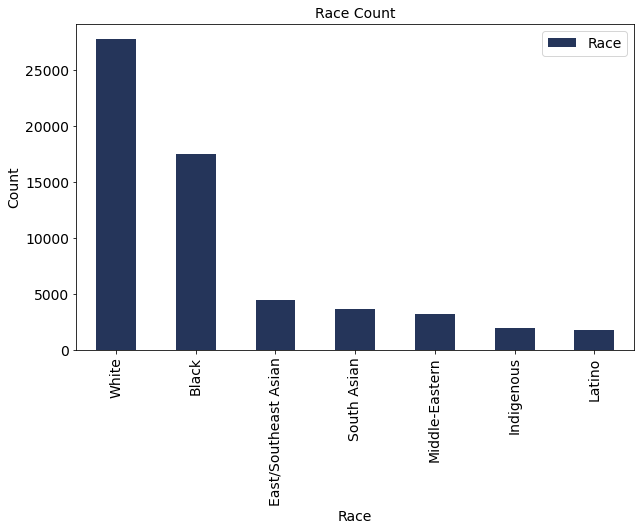

In [ ]:
# Create a bar plot of the count table
race_bar = count_table_race.plot.bar(figsize=(10, 6),fontsize = 14, color='#25355A')

# Set the title and axis labels
race_bar.set_title('Race Count',fontsize = 14)
race_bar.set_xlabel('Race',fontsize = 14)
race_bar.set_ylabel('Count',fontsize = 14)

# Add a legend
race_bar.legend(['Race'],fontsize = 14)

# Strip Search

In [ ]:
count_table_strip = df_cleaned.value_counts(df_cleaned["StripSearch"])
count_table_strip

StripSearch
0    52949
1     7265
dtype: int64

Text(0, 0.5, 'Count')

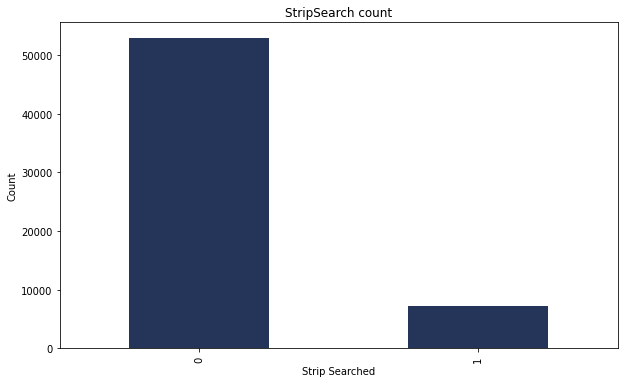

In [ ]:
strip_bar = count_table_strip.plot.bar(figsize=(10, 6),color='#25355A')

strip_bar.set_title('StripSearch count')
strip_bar.set_xlabel('Strip Searched')
strip_bar.set_ylabel('Count')

#Gender


In [ ]:
count_table_Sex = df_cleaned.value_counts(df_cleaned["Sex"])
count_table_Sex

Sex
M    48523
F    11691
dtype: int64

Text(0, 0.5, 'Count')

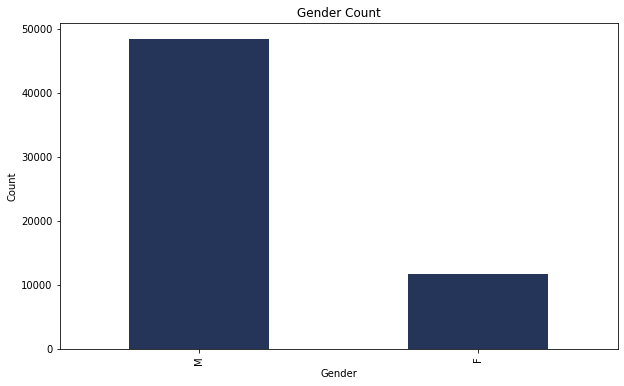

In [ ]:
count_table_Sex = count_table_Sex.plot.bar(figsize=(10, 6),color='#25355A')

count_table_Sex.set_title('Gender Count')
count_table_Sex.set_xlabel('Gender')
count_table_Sex.set_ylabel('Count')

# Mental Health Incident

In [ ]:
count_table_MH_I = df_cleaned.value_counts(df_cleaned["MH_Incident"])
count_table_MH_I

MH_Incident
0    58139
1     2075
dtype: int64

Text(0, 0.5, 'Count')

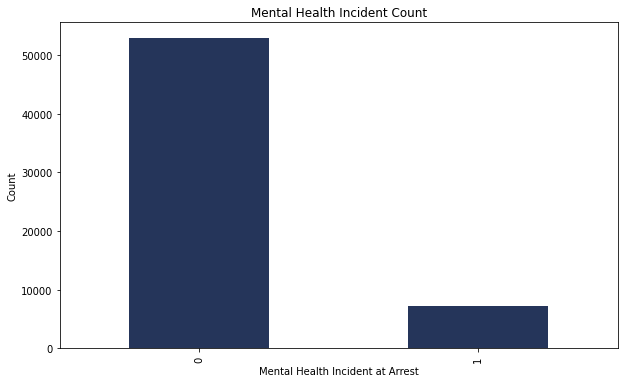

In [ ]:
MH_I_bar = count_table_strip.plot.bar(figsize=(10, 6),color='#25355A')

MH_I_bar.set_title('Mental Health Incident Count')
MH_I_bar.set_xlabel('Mental Health Incident at Arrest')
MH_I_bar.set_ylabel('Count')

# **Pivot Tables and Barplots of Probability**

# Race vs. StripSearch
Tp start, we can look at the absolute value counts of strip searches by race. 

<AxesSubplot:ylabel='Race,StripSearch'>

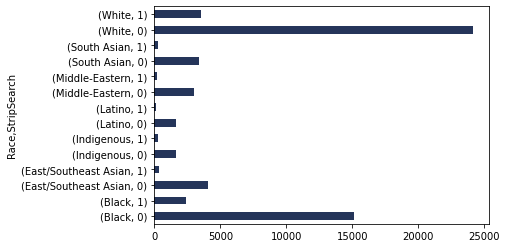

In [ ]:
df_cleaned.groupby('Race').StripSearch.value_counts().plot.barh(color='#25355A')

But this kind of data is difficult to interpret, so we might want to calculate the likelihood of someone of a particular race to be Strip searched upon arrest, by calculating the relative frequency.

In [ ]:
pivot_Race_SS = pd.pivot_table(df_cleaned,index ='Race', values='StripSearch')
pivot_Race_SS

,StripSearch
Race,
Black,0.138879
East/Southeast Asian,0.077237
Indigenous,0.158221
Latino,0.074703
Middle-Eastern,0.070436
South Asian,0.071132
White,0.128653


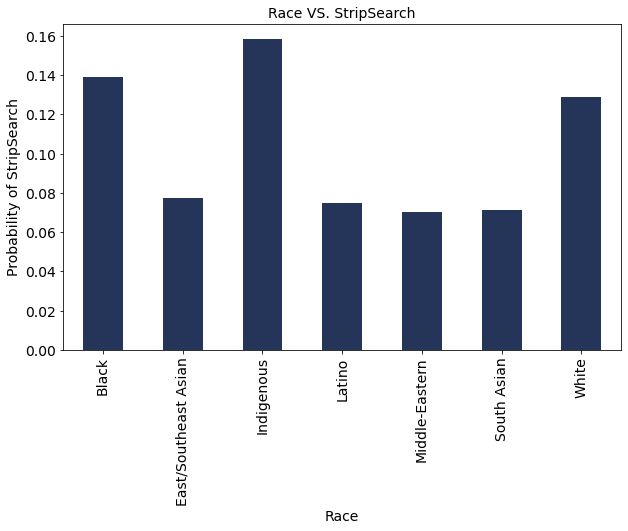

In [ ]:
race_SS_bar = pivot_Race_SS.plot.bar(figsize=(10, 6),fontsize = 14, color='#25355A')

race_SS_bar.set_title('Race VS. StripSearch',fontsize = 14)
race_SS_bar.set_xlabel('Race',fontsize = 14)
race_SS_bar.set_ylabel('Probability of StripSearch',fontsize = 14)
race_SS_bar.legend().remove()

#Sex vs StripSearch

In [ ]:
pivot_Sex_SS = pd.pivot_table(df_cleaned,index ='Sex', values='StripSearch')
pivot_Sex_SS

,StripSearch
Sex,
F,0.101531
M,0.125260


# Mental Health Incident vs. StripSearch

The following table calculates the likelihood of someone experiencing a mental health incident to be Strip searched upon arrest, based on a relative frequency.


In [ ]:
pivot_MH_Incident_SS = pd.pivot_table(df_cleaned,index ='MH_Incident', values='StripSearch')
pivot_MH_Incident_SS

,StripSearch
MH_Incident,
0,0.115293
1,0.270843


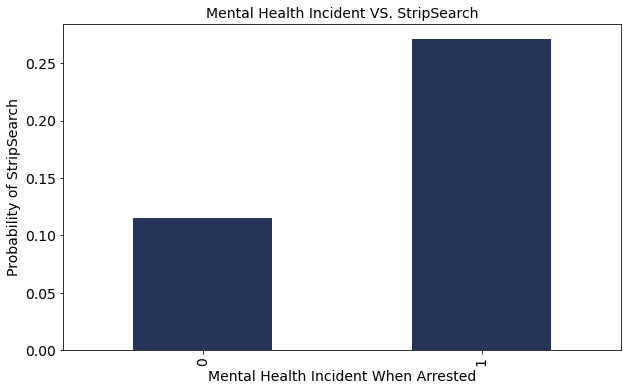

In [ ]:
MH_Incident_SS_bar = pivot_MH_Incident_SS.plot.bar(figsize=(10, 6),\
                                                   fontsize = 14,\
                                                   color='#25355A')

MH_Incident_SS_bar.set_title('Mental Health Incident VS. StripSearch',fontsize = 14)
MH_Incident_SS_bar.set_xlabel('Mental Health Incident When Arrested',fontsize = 14)
MH_Incident_SS_bar.set_ylabel('Probability of StripSearch',fontsize = 14)
MH_Incident_SS_bar.legend().remove()

# Race vs. Mental Health Incident
First a value count chart.

<AxesSubplot:ylabel='Race,MH_Incident'>

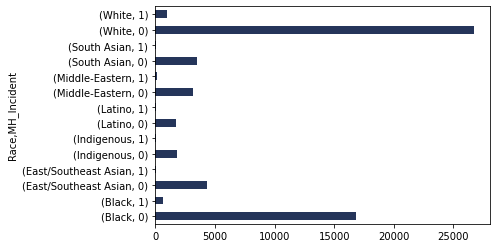

In [ ]:
df_cleaned.groupby('Race').MH_Incident.value_counts().plot.barh(color='#25355A')

The likelihood of someone of a particular race to have been arrested while experiencing a mental health incident.

In [ ]:
pivot_Race_MH_Incident = pd.pivot_table(df_cleaned,index ='Race', values='MH_Incident')
pivot_Race_MH_Incident

,MH_Incident
Race,
Black,0.037944
East/Southeast Asian,0.024009
Indigenous,0.040331
Latino,0.023769
Middle-Eastern,0.033982
South Asian,0.022696
White,0.035789


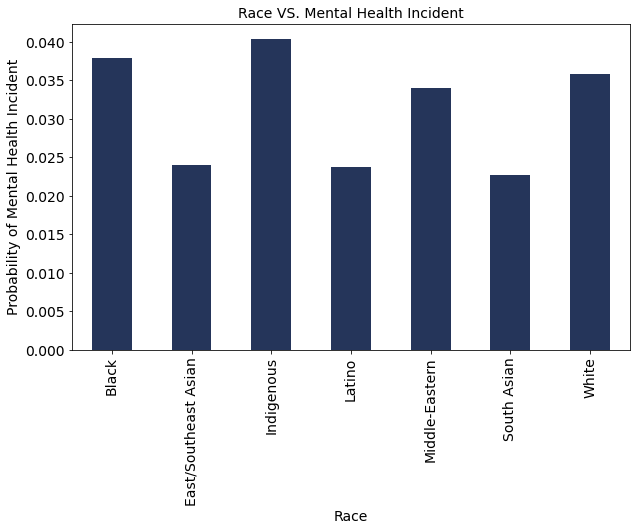

In [ ]:
MH_Incident_Race_bar = pivot_Race_MH_Incident.plot.bar(figsize=(10, 6),\
                                                       fontsize = 14, \
                                                       color='#25355A')

# Set the title and axis labels
MH_Incident_Race_bar.set_title('Race VS. Mental Health Incident',fontsize = 14)

MH_Incident_Race_bar.set_ylabel('Probability of Mental Health Incident',fontsize = 14)
MH_Incident_Race_bar.set_xlabel('Race',fontsize = 14)
MH_Incident_Race_bar.legend().remove()

# Chi-square test: relationship of Race and stripsearch

In [ ]:
from scipy.stats import chi2_contingency
# create a contingency table
table = pd.crosstab(df_cleaned['StripSearch'], df_cleaned['Race'])

# perform the chi-square test
stat, p, dof, expected = chi2_contingency(table)


# print the results
print('Chi-square test statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square test statistic: 371.4036228826853
p-value: 3.9084767974984385e-77
Degrees of freedom: 6
Expected frequencies: [[15411.58604883  3882.35492443  1700.67370869  1553.82132536
   2846.47404086  3177.11174224 24373.9782096 ]
 [ 2114.41395117   532.64507557   233.32629131   213.17867464
    390.52595914   435.88825776  3344.0217904 ]]


# Chi-square test: relationship of Sex and stripsearch





In [ ]:
from scipy.stats import chi2_contingency
# create a contingency table
table_SSS = pd.crosstab(df_cleaned['StripSearch'], df_cleaned['Sex'])

# perform the chi-square test
stat, p, dof, expected = chi2_contingency(table_SSS)


# print the results
print('Chi-square test statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square test statistic: 49.776097486009675
p-value: 1.7233064582757726e-12
Degrees of freedom: 1
Expected frequencies: [[10280.44572691 42668.55427309]
 [ 1410.55427309  5854.44572691]]


# T test: Race vs total search reasons


Organize the table to be able to conduct a t-test (add quantitative data) 

Logic behind the table:

There are four columns regarding Search reasons, they can be added up to a new column called total number of search reasons.

As White people and Black people represent the majority of arrestees, I wonder whether the police will have more reasons to perform a strip search for a Black arrestee.

So t test will be used.

H0: the sample means of the number of reasons to perform strip search for White and Black arrestees are equal. <br>
HA: The sample means of the number of reasons to perform a strip search White and Black arresteses are not equal


In [ ]:
# Remove columns unnecessary to analysis
col1 = ['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID','Age_group__at_arrest_',\
       'Youth_at_arrest__under_18_years','Booked', 'Occurrence_Category','Actions_at_arrest___Concealed_i',\
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst',\
       'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative',\
       'ItemsFound', 'ObjectId','ArrestLocDiv']
# Remove NaN
df_cleaned1 = df.drop(columns=col1).dropna(axis=0)
# Add a column called total number of SearchReasons, adding up reasons
df_cleaned1['Total_SearchReason'] = df_cleaned1.apply(lambda row: row['SearchReason_CauseInjury'] + row['SearchReason_AssistEscape'] + \
                                    row['SearchReason_PossessWeapons'] + row['SearchReason_PossessEvidence'], axis=1)

In [ ]:
# Keep only White and Black races for a two samples to t test with
df_cleaned1_1 = df_cleaned1.loc[df_cleaned1['Perceived_Race'].isin(['Black', 'White','Indigenous'])]
df_cleaned1_1

,Perceived_Race,Sex,StripSearch,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,Total_SearchReason
12,Black,M,1,1.0,1.0,1.0,0.0,3.0
14,Black,M,1,1.0,1.0,1.0,0.0,3.0
33,White,M,1,0.0,0.0,1.0,1.0,2.0
52,White,M,1,1.0,1.0,1.0,1.0,4.0
56,White,F,1,1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...
63602,White,M,1,1.0,0.0,1.0,1.0,3.0
63915,Black,M,1,1.0,0.0,0.0,1.0,2.0
64108,White,M,1,0.0,0.0,0.0,0.0,0.0
64347,Black,M,1,0.0,0.0,1.0,1.0,2.0


Levene test to test whether the population variance is equal or not, to choose t test  (Maybe we do not need this step...)

H0: The population variances are equal<br>
HA: The population variances are not equal

In [ ]:
# levene to test whether have same population variance
from scipy.stats import levene

# data for two groups
white_data = df_cleaned1_1[df_cleaned1_1['Perceived_Race']=='White']
black_data = df_cleaned1_1[df_cleaned1_1['Perceived_Race']=='Black']
white = white_data['Total_SearchReason']
black = black_data['Total_SearchReason']
# conduct Levene's test
stat, pvalue = levene(white, black)

# print the test statistic and p-value
print('Test statistic:', stat)
print('P-value:', pvalue)


Test statistic: 1.930249992122145
P-value: 0.16478266968593444


Since the p-value is greater than 0.05, we can not reject H0, meaning the population variances are equal, and we should use normal t-test.

**Normal t test** **Race vs. total search reasons**


In [ ]:
#CI for race vs total search reason
from scipy.stats import ttest_ind

#calculate the t-statistic and p-value
t_p = ttest_ind(white,black)
print('Ttest results for # of reasons for strip searching White and Black arrestees:',t_p)

#degrees of freedom
df = len(white) + len(black) - 2

#calculate the confidence interval for the difference in means
mean_difference = np.mean(white) - np.mean(black)
sd_difference = np.sqrt((np.var(white) / len(white)) + (np.var(black) / len(black)))
#95% CI
margin_error = 1.96 * sd_difference 
CI_RR = (mean_difference - margin_error, mean_difference + margin_error)

# print the results
print("degrees of freedom: ", df)
print("Mean of total number of reasons for the White arrestees: ", np.mean(white))
print("Mean of total number of reasons for the Black arrestees: ", np.mean(black))
print("Standard deviation of total number of reasons for the White arrestees: ", np.std(white))
print("Standard deviation of total number of reasons for the Black arrestees: ", np.std(black))
print("confidence interval: ", CI_RR)

Ttest results for # of reasons for strip searching White and Black arrestees: Ttest_indResult(statistic=-2.0180774278207982, pvalue=0.04362763265896725)
degrees of freedom:  5998
Mean of total number of reasons for the White arrestees:  1.9649467190128995
Mean of total number of reasons for the Black arrestees:  2.0291700903861956
Standard deviation of total number of reasons for the White arrestees:  1.2127360152573845
Standard deviation of total number of reasons for the Black arrestees:  1.206482239164465
confidence interval:  (-0.1265272859404273, -0.001919456806164753)


# T test: race vs total actions

In [ ]:
# Remove columns unnecessary to analysis
# We also remove "Actions_at_arrest___Cooperative", since it seems not to contribute to strip searches.
col2 = ['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID','Age_group__at_arrest_',\
       'Youth_at_arrest__under_18_years','Booked', 'Occurrence_Category',\
       'Actions_at_arrest___Cooperative',\
       'SearchReason_CauseInjury', 'SearchReason_AssistEscape', \
       'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence',\
       'ItemsFound', 'ObjectId','ArrestLocDiv']

df = pd.read_csv(url)
# Remove NaN
df_cleaned2 = df.drop(columns=col2).dropna(axis=0)
# Add a column called total number of SearchReasons, adding up reasons

df_cleaned2['total_actions'] = df_cleaned2.apply(lambda row: row['Actions_at_arrest___Concealed_i'] + row['Actions_at_arrest___Combative__'] + \
                                    row['Actions_at_arrest___Resisted__d'] + row['Actions_at_arrest___Mental_inst'] + \
                                                      row['Actions_at_arrest___Assaulted_o'], axis=1)
# only for white and black people who are strip searched
df_cleaned2_1 = df_cleaned2.loc[df_cleaned2['Perceived_Race'].isin(['Black', 'White','Indigenous'])].loc[df_cleaned2['StripSearch'].isin([1])]
df_cleaned2_1

,Perceived_Race,Sex,StripSearch,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,total_actions
12,Black,M,1,0,0,0,0,0,0
14,Black,M,1,0,0,0,0,0,0
33,White,M,1,0,0,0,0,0,0
52,White,M,1,0,0,0,0,0,0
56,White,F,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
63602,White,M,1,0,0,0,0,0,0
63915,Black,M,1,0,0,0,0,0,0
64108,White,M,1,0,0,0,0,0,0
64347,Black,M,1,0,0,0,0,0,0


In [ ]:
# data for two groups
white_data_1 = df_cleaned2_1[df_cleaned2_1['Perceived_Race']=='White']
black_data_1 = df_cleaned2_1[df_cleaned2_1['Perceived_Race']=='Black']
white_1 = white_data_1['total_actions']
black_1 = black_data_1['total_actions']

# levene to test whether have same population variance
from scipy.stats import levene


# conduct Levene's test
stat, pvalue = levene(white_1, black_1)

# print the test statistic and p-value
print('Test statistic:', stat)
print('Levene test P-value:', pvalue)



#since population variance might uneuqal, so use weltch t test
#degree of freedom
def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof
welch_dof(white_1,black_1)

Test statistic: 19.53306036861891
Levene test P-value: 1.0061556389580791e-05


4762.8666557312845

In [ ]:
#weltch t test
t_p_action = stats.ttest_ind(white_1, black_1, equal_var=False)
print('Ttest results for # of actions the White and Black who are strip searched :',t_p_action) 

Ttest results for # of actions the White and Black who are strip searched : Ttest_indResult(statistic=-4.312218150819922, pvalue=1.6489231098716865e-05)


In [ ]:
# mean and sd
print('Mean of total number of actions for White and Black who are strip searched:',white_1.mean(), black_1.mean())
print('Standard deviation of total number of actions for white and black who are strip searched :',white_1.std(), black_1.std())

Mean of total number of actions for White and Black who are strip searched: 0.23022994952327538 0.3011503697617091
Standard deviation of total number of actions for white and black who are strip searched : 0.5762920629149696 0.6570171291528663


In [ ]:
#Confidence interval
import statsmodels.stats.api as sms
CI_action = sms.CompareMeans(sms.DescrStatsW(white_1), sms.DescrStatsW(black_1))
print('Confidence interval :',CI_action.tconfint_diff(usevar='unequal'))

Confidence interval : (-0.10316294535720323, -0.03867789511966423)


# T test: Total search reasons for Male vs Female


In [ ]:
# For those searched
df_cleaned_fm = df_cleaned1.loc[df_cleaned1['StripSearch'].isin([1])]
female = df_cleaned_fm[df_cleaned_fm["Sex"]=="F"]
male = df_cleaned_fm[df_cleaned_fm["Sex"]=="M"]
# conduct Levene's test
stat, pvalue = levene(female["Total_SearchReason"], male["Total_SearchReason"])

# print the test statistic and p-value
print('Test statistic for variances:', stat)
print('P-value for variances:', pvalue)


print('Mean of total number of reasons for Females and Males who are strip searched:',female["Total_SearchReason"].mean(), male["Total_SearchReason"].mean())
print('Standard deviation of total number of reasons for Females and Males who are strip searched :',female["Total_SearchReason"].std(), male["Total_SearchReason"].std())

t_p = stats.ttest_ind(female['Total_SearchReason'], male["Total_SearchReason"])
print('Ttest results for # of reasons for strip searching female and male arrestees:',t_p)

#Confidence interval
import statsmodels.stats.api as sms
CI_SS = sms.CompareMeans(sms.DescrStatsW(female["Total_SearchReason"]), sms.DescrStatsW(male["Total_SearchReason"]))
print('Confidence interval :',CI_SS.tconfint_diff(usevar='pooled'))
#dof
dof_g_s = len(female["Total_SearchReason"]) + len(male["Total_SearchReason"]) - 2
print('degree of freedom',dof_g_s)

Test statistic for variances: 2.074194249440296
P-value for variances: 0.14984918047998277
Mean of total number of reasons for Females and Males who are strip searched: 1.86282151208106 2.004296455424275
Standard deviation of total number of reasons for Females and Males who are strip searched : 1.176292261182499 1.2149240591485009
Ttest results for # of reasons for strip searching female and male arrestees: Ttest_indResult(statistic=-3.8323579838957222, pvalue=0.00012791819737753462)
Confidence interval : (-0.21384000951097437, -0.06910987717545514)
degree of freedom 7798


# T test: total actions for male vs. female





In [ ]:
# For those searched
df_cleaned_fm_1 = df_cleaned2.loc[df_cleaned2['StripSearch'].isin([1])]
female_1 = df_cleaned_fm_1[df_cleaned_fm_1["Sex"]=="F"]
male_1 = df_cleaned_fm_1[df_cleaned_fm_1["Sex"]=="M"]

# conduct Levene's test
stat, pvalue = levene(female_1["total_actions"], male_1["total_actions"])

# print the test statistic and p-value
print('Test statistic for variances:', stat)
print('P-value for variances:', pvalue)


print('Mean of total number of actions for Females and Males who are strip searched:',female_1["total_actions"].mean(), male_1["total_actions"].mean())
print('Standard deviation of total number of actions for Females and Males who are strip searched :',female_1["total_actions"].std(), male_1["total_actions"].std())

t_p_1 = stats.ttest_ind(female_1['total_actions'], male_1["total_actions"])
print('Ttest results for # of actions for strip searching White and Black arrestees:',t_p_1)
#Confidence interval
import statsmodels.stats.api as sms
CI_SA = sms.CompareMeans(sms.DescrStatsW(female_1["total_actions"]), sms.DescrStatsW(male_1["total_actions"]))
print('Confidence interval :',CI_SA.tconfint_diff(usevar='pooled'))
#dof
dof_g_a = len(female_1["total_actions"]) + len(male_1["total_actions"]) - 2
print('degree of freedom',dof_g_a)

Test statistic for variances: 0.6522215663664344
P-value for variances: 0.4193441629972747
Mean of total number of actions for Females and Males who are strip searched: 0.24162120031176929 0.2565597667638484
Standard deviation of total number of actions for Females and Males who are strip searched : 0.5944998998905323 0.6077855918458743
Ttest results for # of actions for strip searching White and Black arrestees: Ttest_indResult(statistic=-0.8076023565879649, pvalue=0.41934416300024346)
Confidence interval : (-0.05119848721928853, 0.02132135431513031)
degree of freedom 7798


In [ ]:
df_cleaned_fm_1

,Perceived_Race,Sex,StripSearch,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,total_actions
12,Black,M,1,0,0,0,0,0,0
14,Black,M,1,0,0,0,0,0,0
21,Unknown or Legacy,M,1,0,0,0,0,0,0
33,White,M,1,0,0,0,0,0,0
38,Latino,M,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
63915,Black,M,1,0,0,0,0,0,0
64108,White,M,1,0,0,0,0,0,0
64235,South Asian,M,1,0,0,0,0,0,0
64347,Black,M,1,0,0,0,0,0,0


# **Conduct One Way and Two Way ANOVA on the features of interest.**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Remove columns unnecessary to analysis
# We also remove "Actions_at_arrest___Cooperative", since it seems not to contribute to strip searches.
col3 = ['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID','Age_group__at_arrest_',\
       'Youth_at_arrest__under_18_years','Booked', 'Occurrence_Category',\
       'Actions_at_arrest___Cooperative',\
       'ItemsFound', 'ObjectId','ArrestLocDiv']
# Remove NaN
df_cleaned3 = df.drop(columns=col3).dropna(axis=0)

# Add a column called total number of SearchReasons, adding up reasons

df_cleaned3['Total_Actions'] = df_cleaned3.apply(lambda row: row['Actions_at_arrest___Concealed_i'] + row['Actions_at_arrest___Combative__'] + \
                                    row['Actions_at_arrest___Resisted__d'] + row['Actions_at_arrest___Mental_inst'] + \
                                                      row['Actions_at_arrest___Assaulted_o'], axis=1)
df_cleaned3['Total_Search'] = df_cleaned3['Total_SearchReason'] = df_cleaned3.apply(lambda row: row['SearchReason_CauseInjury'] + row['SearchReason_AssistEscape'] + \
                                    row['SearchReason_PossessWeapons'] + row['SearchReason_PossessEvidence'], axis=1)

# Only those strip searched
df_cleaned3 = df_cleaned3.loc[df_cleaned3['StripSearch'].isin([1])]
df_cleaned3

,Perceived_Race,Sex,StripSearch,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,Total_Actions,Total_Search,Total_SearchReason
12,Black,M,1,0,0,0,0,0,1.0,1.0,1.0,0.0,0,3.0,3.0
14,Black,M,1,0,0,0,0,0,1.0,1.0,1.0,0.0,0,3.0,3.0
21,Unknown or Legacy,M,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0,1.0,1.0
33,White,M,1,0,0,0,0,0,0.0,0.0,1.0,1.0,0,2.0,2.0
38,Latino,M,1,0,0,0,0,0,1.0,0.0,1.0,0.0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,Black,M,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0,2.0,2.0
64108,White,M,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
64235,South Asian,M,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0,1.0,1.0
64347,Black,M,1,0,0,0,0,0,0.0,0.0,1.0,1.0,0,2.0,2.0


#7.1.1 Race and Actions at Arrest

In [ ]:
# ANOVA on Race and Actions at Arrest
mod = ols('Total_Actions ~ Perceived_Race', df_cleaned3).fit()
sm.stats.anova_lm(mod, typ=2, robust="hc3")

,sum_sq,df,F,PR(>F)
Perceived_Race,12.474214,7.0,4.87638,0.000017
Residual,2847.518265,7792.0,NaN,NaN


In [ ]:
# Tukey HSD on the Total Actions and Perceived Race
print(pairwise_tukeyhsd(endog=df_cleaned3['Total_Actions'],groups=df_cleaned3['Perceived_Race'], alpha=0.05))

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1252 0.0082 -0.2312 -0.0192   True
               Black           Indigenous   0.0387    0.9 -0.0724  0.1499  False
               Black               Latino  -0.0587    0.9 -0.2225  0.1051  False
               Black       Middle-Eastern  -0.0424    0.9 -0.1693  0.0846  False
               Black          South Asian  -0.0716 0.6002 -0.1918  0.0486  False
               Black    Unknown or Legacy  -0.0885 0.0451 -0.1759  -0.001   True
               Black                White  -0.0709  0.001 -0.1191 -0.0227   True
East/Southeast Asian           Indigenous   0.1639 0.0134  0.0196  0.3082   True
East/Southeast Asian               Latino   0.0665    0.9 -0.1214  0.2543  False
East/Southeast Asian       M

In [ ]:
#Calculate means and confidence intervals for rejected null hypotheses
mean_white = df_cleaned3[df_cleaned3['Perceived_Race']=='White']["Total_Actions"].mean()
mean_black = df_cleaned3[df_cleaned3['Perceived_Race']=='Black']["Total_Actions"].mean()
mean_eseasian = df_cleaned3[df_cleaned3['Perceived_Race']=='East/Southeast Asian']["Total_Actions"].mean()
mean_indigenous = df_cleaned3[df_cleaned3['Perceived_Race']=='Indigenous']["Total_Actions"].mean()
mean_unknown = df_cleaned3[df_cleaned3['Perceived_Race']=='Unknown or Legacy']["Total_Actions"].mean()

print(f"The mean actions for a White arrestee is: {mean_white}")
print(f"The mean actions for a Black arrestee is: {mean_black}")
print(f"The mean actions for an East/Southeast Asian arrestee is: {mean_eseasian}")
print(f"The mean actions for an Indigenous arrestee is: {mean_indigenous}")
print(f"The mean actions for an Unknown or Legacy arrestee is: {mean_unknown}")

# Calculate confidence intervals
CI_white = sms.DescrStatsW(df_cleaned3['Total_Actions'][df['Perceived_Race']=="White"]).tconfint_mean()
CI_black = sms.DescrStatsW(df_cleaned3['Total_Actions'][df['Perceived_Race']=="Black"]).tconfint_mean()
CI_eseasian = sms.DescrStatsW(df_cleaned3['Total_Actions'][df['Perceived_Race']=="East/Southeast Asian"]).tconfint_mean()
CI_indigenous = sms.DescrStatsW(df_cleaned3['Total_Actions'][df['Perceived_Race']=="Indigenous"]).tconfint_mean()
CI_unknown = sms.DescrStatsW(df_cleaned3['Total_Actions'][df['Perceived_Race']=="Unknown or Legacy"]).tconfint_mean()

print(f'Confidence interval for mean search reasons for a white arrestee is: {CI_white}')
print(f'Confidence interval for mean search reasons for a black arrestee is: {CI_black}')
print(f'Confidence interval for mean search reasons for an east/southeast asian arrestee is: {CI_eseasian}')
print(f'Confidence interval for mean search reasons for an indigenous arrestee is: {CI_indigenous}')
print(f'Confidence interval for mean search reasons for an unknown or legacy arrestee is: {CI_unknown}')

The mean actions for a White arrestee is: 0.23022994952327538
The mean actions for a Black arrestee is: 0.3011503697617091
The mean actions for an East/Southeast Asian arrestee is: 0.17595307917888564
The mean actions for an Indigenous arrestee is: 0.33986928104575165
The mean actions for an Unknown or Legacy arrestee is: 0.2126865671641791
Confidence interval for mean search reasons for a white arrestee is: (0.21130879934562793, 0.24915109970092283)
Confidence interval for mean search reasons for a black arrestee is: (0.2750359367921776, 0.32726480273124064)
Confidence interval for mean search reasons for an east/southeast asian arrestee is: (0.12382082127994531, 0.22808533707782597)
Confidence interval for mean search reasons for an indigenous arrestee is: (0.2592508383739315, 0.4204877237175718)
Confidence interval for mean search reasons for an unknown or legacy arrestee is: (0.16433177941752408, 0.26104135491083413)


#7.1.2 Sex and Actions at Arrest


In [ ]:
# ANOVA on Sex and Actions at Arrest
mod = ols('Total_Actions ~ Sex', df_cleaned3).fit()
sm.stats.anova_lm(mod, typ=2, robust="hc3")

,sum_sq,df,F,PR(>F)
Sex,0.246256,1.0,0.671406,0.412587
Residual,2860.129498,7798.0,NaN,NaN


As there is no statistically significant difference in means, post-hoc tests are not required.


#7.1.3 Race and Total Search Reasons

In [ ]:
# Checking Total_Search Means by Perceived Race
mod = ols('Total_Search ~ Perceived_Race', df_cleaned3).fit()
sm.stats.anova_lm(mod, typ=2, robust="hc3")

,sum_sq,df,F,PR(>F)
Perceived_Race,18.128132,7.0,1.770831,0.088443
Residual,11395.330340,7792.0,NaN,NaN


As the ANOVA did not indicate a statistically significant difference in means, post-hoc tests are not required.


#7.1.4 Sex and Total Search Reasons

In [ ]:
# To make the model to run ANOVA
mod = ols('Total_Search ~ Sex', df_cleaned3).fit()
sm.stats.anova_lm(mod, typ=2, robust="hc3")

,sum_sq,df,F,PR(>F)
Sex,22.391354,1.0,15.327583,0.000091
Residual,11391.736285,7798.0,NaN,NaN


In [ ]:
# Tukey HSD since we have determined there are unequal variances, and we want a conservative estimate.
print(pairwise_tukeyhsd(endog=df_cleaned3['Total_Search'],groups=df_cleaned3['Sex'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     F      M   0.1415 0.001 0.0691 0.2138   True
-------------------------------------------------


In [ ]:
# Caluclate the confidence interval as means have already been calculated
CI_Female = sms.DescrStatsW(df_cleaned3['Total_Search'][df['Sex']=="F"]).tconfint_mean()
CI_Male = sms.DescrStatsW(df_cleaned3['Total_Search'][df['Sex']=="M"]).tconfint_mean()
print(f'Confidence interval for mean search reasons for women is: {CI_Female}')
print(f'Confidence interval for mean search reasons for men is: {CI_Male}')

Confidence interval for mean search reasons for women is: (1.7983956532369325, 1.9272473709251876)
Confidence interval for mean search reasons for men is: (1.974794279961762, 2.0337986308867877)


#7.2 Interaction with Two Way ANOVA

In [ ]:
formula = 'Total_Actions ~ + C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex) '
mod = ols(formula, df_cleaned3).fit()
print(sm.stats.anova_lm(mod, typ=2, robust="hc3"))

                               sum_sq      df         F    PR(>F)
C(Perceived_Race)           12.456495     7.0  4.869146  0.000017
C(Sex)                       0.307261     1.0  0.840741  0.359213
C(Perceived_Race):C(Sex)     2.667133     7.0  1.042561  0.398640
Residual                  2844.774504  7784.0       NaN       NaN


In [ ]:
formula = 'Total_Search ~ + C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex) '
mod = ols(formula, df_cleaned3).fit()
print(sm.stats.anova_lm(mod, typ=2, robust="hc3"))

                                sum_sq      df          F    PR(>F)
C(Perceived_Race)            16.463711     7.0   1.611329  0.127075
C(Sex)                       20.588048     1.0  14.104890  0.000174
C(Perceived_Race):C(Sex)     14.290093     7.0   1.398594  0.200960
Residual                  11361.830249  7784.0        NaN       NaN


interaction_plot number of total actions by Race  and Sex

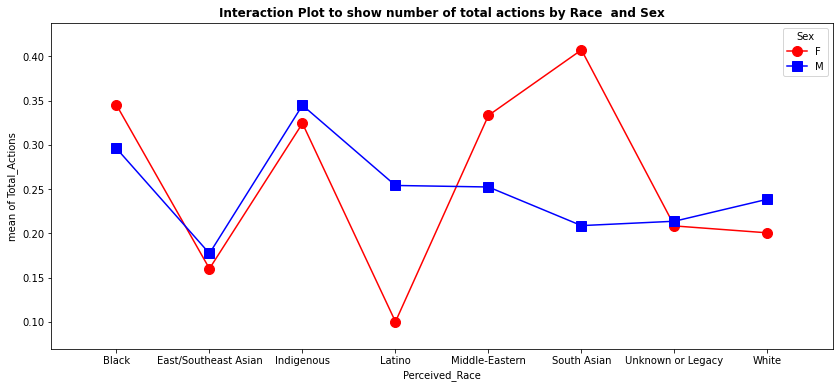

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
df_cleaned3_1 = df_cleaned3.reset_index(inplace=False)
Sex = df_cleaned3_1['Sex'].astype("category")
Total_Actions = df_cleaned3_1['Total_Actions']
Perceived_Race = df_cleaned3_1['Perceived_Race']
fig, ax = plt.subplots(figsize=(14, 6))
fig = interaction_plot(Perceived_Race, Sex, Total_Actions, colors=['red', 'blue'], markers=['o', 's'], ms=10, ax=ax)
plt.title('Interaction Plot to show number of total actions by Race  and Sex', fontweight='bold')
plt.show()


Interaction Plot to show number of total search reasons by Race  and Sex

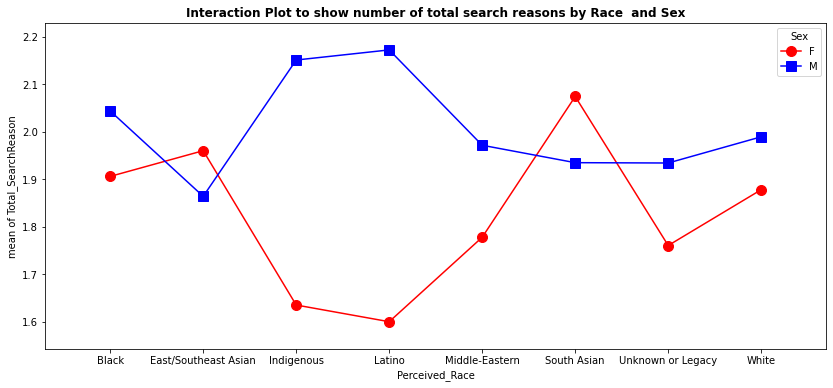

In [76]:
#Interaction Plot to show number of total search questions by Race  and Sex
fig, ax = plt.subplots(figsize=(14, 6))
Total_SearchReason = df_cleaned3_1['Total_SearchReason']
fig = interaction_plot(Perceived_Race, Sex, Total_SearchReason, colors=['red', 'blue'], markers=['o', 's'], ms=10, ax=ax)
plt.title('Interaction Plot to show number of total search reasons by Race  and Sex', fontweight='bold')
plt.show()

# Add some plot based on df-cleaned3.(eda part)

In [ ]:
df_cleaned3

,Perceived_Race,Sex,StripSearch,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,Total_Actions,Total_Search,Total_SearchReason
12,Black,M,1,0,0,0,0,0,1.0,1.0,1.0,0.0,0,3.0,3.0
14,Black,M,1,0,0,0,0,0,1.0,1.0,1.0,0.0,0,3.0,3.0
21,Unknown or Legacy,M,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0,1.0,1.0
33,White,M,1,0,0,0,0,0,0.0,0.0,1.0,1.0,0,2.0,2.0
38,Latino,M,1,0,0,0,0,0,1.0,0.0,1.0,0.0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,Black,M,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0,2.0,2.0
64108,White,M,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
64235,South Asian,M,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0,1.0,1.0
64347,Black,M,1,0,0,0,0,0,0.0,0.0,1.0,1.0,0,2.0,2.0


box plot: gender,total search reason, race

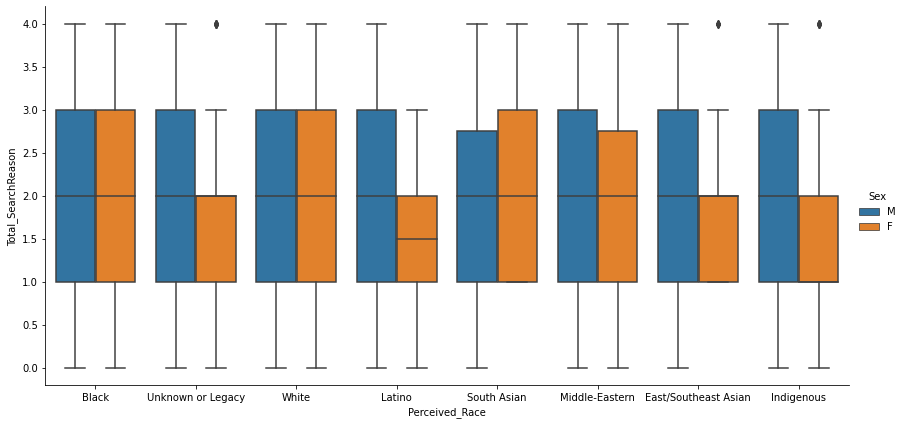

In [ ]:
import seaborn as sns
sns.catplot(data=df_cleaned3, kind="box", x="Perceived_Race", y="Total_SearchReason", hue="Sex",height=6, aspect=2)